## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 64
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9827946	total: 70.4ms	remaining: 1m 10s
1:	learn: 0.9623459	total: 71.7ms	remaining: 35.8s
2:	learn: 0.9430877	total: 73ms	remaining: 24.3s
3:	learn: 0.9285250	total: 74.2ms	remaining: 18.5s
4:	learn: 0.9117015	total: 76.9ms	remaining: 15.3s
5:	learn: 0.8963818	total: 78.4ms	remaining: 13s
6:	learn: 0.8809509	total: 79.5ms	remaining: 11.3s
7:	learn: 0.8656752	total: 80.6ms	remaining: 9.99s
8:	learn: 0.8506093	total: 81.4ms	remaining: 8.97s
9:	learn: 0.8350652	total: 82.2ms	remaining: 8.14s
10:	learn: 0.8212970	total: 83ms	remaining: 7.46s
11:	learn: 0.8061724	total: 83.8ms	remaining: 6.9s
12:	learn: 0.7915030	total: 84.6ms	remaining: 6.42s
13:	learn: 0.7771673	total: 85.4ms	remaining: 6.01s
14:	learn: 0.7646800	total: 86.3ms	remaining: 5.67s
15:	learn: 0.7506841	total: 87.3ms	remaining: 5.37s
16:	learn: 0.7394840	total: 88.4ms	remaining: 5.11s
17:	learn: 0.7274196	total: 89.2ms	remaining: 4.87s
18:	learn: 0.7146071	total: 90.1ms	remaining: 4.65

41:	learn: 0.5129165	total: 110ms	remaining: 2.51s
42:	learn: 0.5074483	total: 112ms	remaining: 2.48s
43:	learn: 0.5017721	total: 113ms	remaining: 2.44s
44:	learn: 0.4958803	total: 113ms	remaining: 2.4s
45:	learn: 0.4905584	total: 114ms	remaining: 2.37s
46:	learn: 0.4864456	total: 115ms	remaining: 2.33s
47:	learn: 0.4804371	total: 116ms	remaining: 2.3s
48:	learn: 0.4763119	total: 117ms	remaining: 2.26s
49:	learn: 0.4717671	total: 117ms	remaining: 2.23s
50:	learn: 0.4662754	total: 118ms	remaining: 2.2s
51:	learn: 0.4615900	total: 119ms	remaining: 2.17s
52:	learn: 0.4567411	total: 120ms	remaining: 2.14s
53:	learn: 0.4527048	total: 121ms	remaining: 2.11s
54:	learn: 0.4478988	total: 122ms	remaining: 2.09s
55:	learn: 0.4438719	total: 122ms	remaining: 2.06s
56:	learn: 0.4401921	total: 123ms	remaining: 2.04s
57:	learn: 0.4354274	total: 124ms	remaining: 2.01s
58:	learn: 0.4315156	total: 125ms	remaining: 1.99s
59:	learn: 0.4272721	total: 126ms	remaining: 1.97s
60:	learn: 0.4240073	total: 127ms	

138:	learn: 0.2691270	total: 191ms	remaining: 1.19s
139:	learn: 0.2678892	total: 193ms	remaining: 1.18s
140:	learn: 0.2670214	total: 194ms	remaining: 1.18s
141:	learn: 0.2663121	total: 195ms	remaining: 1.18s
142:	learn: 0.2655406	total: 195ms	remaining: 1.17s
143:	learn: 0.2642831	total: 196ms	remaining: 1.17s
144:	learn: 0.2629726	total: 197ms	remaining: 1.16s
145:	learn: 0.2623469	total: 198ms	remaining: 1.16s
146:	learn: 0.2615367	total: 199ms	remaining: 1.16s
147:	learn: 0.2607712	total: 200ms	remaining: 1.15s
148:	learn: 0.2598835	total: 201ms	remaining: 1.15s
149:	learn: 0.2591664	total: 202ms	remaining: 1.14s
150:	learn: 0.2583373	total: 203ms	remaining: 1.14s
151:	learn: 0.2575928	total: 204ms	remaining: 1.14s
152:	learn: 0.2569090	total: 205ms	remaining: 1.13s
153:	learn: 0.2561710	total: 206ms	remaining: 1.13s
154:	learn: 0.2554887	total: 207ms	remaining: 1.13s
155:	learn: 0.2547187	total: 207ms	remaining: 1.12s
156:	learn: 0.2541119	total: 208ms	remaining: 1.12s
157:	learn: 

266:	learn: 0.1946032	total: 300ms	remaining: 824ms
267:	learn: 0.1944102	total: 301ms	remaining: 823ms
268:	learn: 0.1938438	total: 302ms	remaining: 821ms
269:	learn: 0.1932909	total: 303ms	remaining: 819ms
270:	learn: 0.1931495	total: 304ms	remaining: 816ms
271:	learn: 0.1925486	total: 304ms	remaining: 815ms
272:	learn: 0.1919367	total: 305ms	remaining: 813ms
273:	learn: 0.1915633	total: 306ms	remaining: 811ms
274:	learn: 0.1910891	total: 307ms	remaining: 810ms
275:	learn: 0.1908161	total: 308ms	remaining: 808ms
276:	learn: 0.1905320	total: 309ms	remaining: 806ms
277:	learn: 0.1900754	total: 310ms	remaining: 804ms
278:	learn: 0.1899636	total: 310ms	remaining: 802ms
279:	learn: 0.1897901	total: 312ms	remaining: 802ms
280:	learn: 0.1896598	total: 313ms	remaining: 800ms
281:	learn: 0.1890257	total: 314ms	remaining: 798ms
282:	learn: 0.1884456	total: 315ms	remaining: 797ms
283:	learn: 0.1882322	total: 315ms	remaining: 795ms
284:	learn: 0.1880432	total: 316ms	remaining: 793ms
285:	learn: 

363:	learn: 0.1589083	total: 382ms	remaining: 668ms
364:	learn: 0.1586144	total: 383ms	remaining: 667ms
365:	learn: 0.1584246	total: 384ms	remaining: 665ms
366:	learn: 0.1580733	total: 385ms	remaining: 664ms
367:	learn: 0.1576619	total: 386ms	remaining: 662ms
368:	learn: 0.1572306	total: 386ms	remaining: 661ms
369:	learn: 0.1569176	total: 387ms	remaining: 659ms
370:	learn: 0.1565968	total: 388ms	remaining: 658ms
371:	learn: 0.1562216	total: 389ms	remaining: 656ms
372:	learn: 0.1559310	total: 390ms	remaining: 655ms
373:	learn: 0.1556369	total: 390ms	remaining: 654ms
374:	learn: 0.1552678	total: 391ms	remaining: 652ms
375:	learn: 0.1550487	total: 392ms	remaining: 651ms
376:	learn: 0.1548224	total: 393ms	remaining: 649ms
377:	learn: 0.1545654	total: 394ms	remaining: 648ms
378:	learn: 0.1542716	total: 395ms	remaining: 647ms
379:	learn: 0.1539747	total: 395ms	remaining: 645ms
380:	learn: 0.1536416	total: 396ms	remaining: 644ms
381:	learn: 0.1532489	total: 397ms	remaining: 642ms
382:	learn: 

492:	learn: 0.1244430	total: 491ms	remaining: 505ms
493:	learn: 0.1241895	total: 492ms	remaining: 504ms
494:	learn: 0.1239492	total: 493ms	remaining: 503ms
495:	learn: 0.1238263	total: 493ms	remaining: 501ms
496:	learn: 0.1235543	total: 494ms	remaining: 500ms
497:	learn: 0.1233334	total: 495ms	remaining: 499ms
498:	learn: 0.1231003	total: 496ms	remaining: 498ms
499:	learn: 0.1228593	total: 497ms	remaining: 497ms
500:	learn: 0.1227074	total: 497ms	remaining: 495ms
501:	learn: 0.1223662	total: 498ms	remaining: 494ms
502:	learn: 0.1222334	total: 499ms	remaining: 493ms
503:	learn: 0.1219869	total: 500ms	remaining: 492ms
504:	learn: 0.1217873	total: 501ms	remaining: 491ms
505:	learn: 0.1215769	total: 502ms	remaining: 490ms
506:	learn: 0.1213659	total: 502ms	remaining: 489ms
507:	learn: 0.1212253	total: 503ms	remaining: 487ms
508:	learn: 0.1210851	total: 504ms	remaining: 486ms
509:	learn: 0.1208769	total: 505ms	remaining: 485ms
510:	learn: 0.1206920	total: 506ms	remaining: 484ms
511:	learn: 

592:	learn: 0.1062331	total: 573ms	remaining: 393ms
593:	learn: 0.1060884	total: 574ms	remaining: 392ms
594:	learn: 0.1060675	total: 575ms	remaining: 391ms
595:	learn: 0.1059545	total: 576ms	remaining: 390ms
596:	learn: 0.1058461	total: 577ms	remaining: 389ms
597:	learn: 0.1056703	total: 578ms	remaining: 388ms
598:	learn: 0.1055354	total: 578ms	remaining: 387ms
599:	learn: 0.1053538	total: 579ms	remaining: 386ms
600:	learn: 0.1051671	total: 580ms	remaining: 385ms
601:	learn: 0.1049473	total: 581ms	remaining: 384ms
602:	learn: 0.1047539	total: 581ms	remaining: 383ms
603:	learn: 0.1047250	total: 582ms	remaining: 382ms
604:	learn: 0.1045747	total: 583ms	remaining: 381ms
605:	learn: 0.1043829	total: 584ms	remaining: 380ms
606:	learn: 0.1042051	total: 585ms	remaining: 379ms
607:	learn: 0.1040519	total: 585ms	remaining: 377ms
608:	learn: 0.1038673	total: 586ms	remaining: 376ms
609:	learn: 0.1036393	total: 587ms	remaining: 375ms
610:	learn: 0.1034461	total: 588ms	remaining: 374ms
611:	learn: 

723:	learn: 0.0879726	total: 681ms	remaining: 260ms
724:	learn: 0.0879242	total: 682ms	remaining: 259ms
725:	learn: 0.0877472	total: 683ms	remaining: 258ms
726:	learn: 0.0876566	total: 684ms	remaining: 257ms
727:	learn: 0.0875399	total: 684ms	remaining: 256ms
728:	learn: 0.0875303	total: 685ms	remaining: 255ms
729:	learn: 0.0875046	total: 686ms	remaining: 254ms
730:	learn: 0.0874538	total: 687ms	remaining: 253ms
731:	learn: 0.0873835	total: 688ms	remaining: 252ms
732:	learn: 0.0872278	total: 688ms	remaining: 251ms
733:	learn: 0.0870703	total: 689ms	remaining: 250ms
734:	learn: 0.0868799	total: 690ms	remaining: 249ms
735:	learn: 0.0868483	total: 691ms	remaining: 248ms
736:	learn: 0.0866835	total: 692ms	remaining: 247ms
737:	learn: 0.0864905	total: 693ms	remaining: 246ms
738:	learn: 0.0863707	total: 694ms	remaining: 245ms
739:	learn: 0.0861633	total: 694ms	remaining: 244ms
740:	learn: 0.0861203	total: 695ms	remaining: 243ms
741:	learn: 0.0860234	total: 696ms	remaining: 242ms
742:	learn: 

821:	learn: 0.0772380	total: 763ms	remaining: 165ms
822:	learn: 0.0771111	total: 764ms	remaining: 164ms
823:	learn: 0.0769290	total: 765ms	remaining: 163ms
824:	learn: 0.0769218	total: 766ms	remaining: 162ms
825:	learn: 0.0768345	total: 766ms	remaining: 161ms
826:	learn: 0.0768085	total: 767ms	remaining: 161ms
827:	learn: 0.0766889	total: 768ms	remaining: 160ms
828:	learn: 0.0765662	total: 769ms	remaining: 159ms
829:	learn: 0.0764276	total: 770ms	remaining: 158ms
830:	learn: 0.0763825	total: 770ms	remaining: 157ms
831:	learn: 0.0762301	total: 771ms	remaining: 156ms
832:	learn: 0.0761976	total: 772ms	remaining: 155ms
833:	learn: 0.0760765	total: 773ms	remaining: 154ms
834:	learn: 0.0760710	total: 773ms	remaining: 153ms
835:	learn: 0.0760572	total: 774ms	remaining: 152ms
836:	learn: 0.0760395	total: 775ms	remaining: 151ms
837:	learn: 0.0760241	total: 776ms	remaining: 150ms
838:	learn: 0.0759402	total: 777ms	remaining: 149ms
839:	learn: 0.0758616	total: 777ms	remaining: 148ms
840:	learn: 

953:	learn: 0.0647010	total: 871ms	remaining: 42ms
954:	learn: 0.0646612	total: 872ms	remaining: 41.1ms
955:	learn: 0.0645097	total: 873ms	remaining: 40.2ms
956:	learn: 0.0643685	total: 873ms	remaining: 39.2ms
957:	learn: 0.0643156	total: 874ms	remaining: 38.3ms
958:	learn: 0.0641585	total: 875ms	remaining: 37.4ms
959:	learn: 0.0641460	total: 876ms	remaining: 36.5ms
960:	learn: 0.0640545	total: 877ms	remaining: 35.6ms
961:	learn: 0.0639106	total: 877ms	remaining: 34.7ms
962:	learn: 0.0638241	total: 878ms	remaining: 33.7ms
963:	learn: 0.0636717	total: 879ms	remaining: 32.8ms
964:	learn: 0.0636218	total: 880ms	remaining: 31.9ms
965:	learn: 0.0635122	total: 881ms	remaining: 31ms
966:	learn: 0.0634179	total: 882ms	remaining: 30.1ms
967:	learn: 0.0633063	total: 883ms	remaining: 29.2ms
968:	learn: 0.0631905	total: 884ms	remaining: 28.3ms
969:	learn: 0.0631750	total: 885ms	remaining: 27.4ms
970:	learn: 0.0631082	total: 885ms	remaining: 26.4ms
971:	learn: 0.0630176	total: 886ms	remaining: 25.5

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

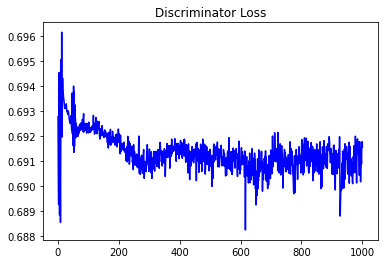

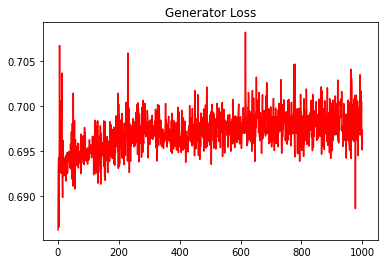

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.0955111570370852


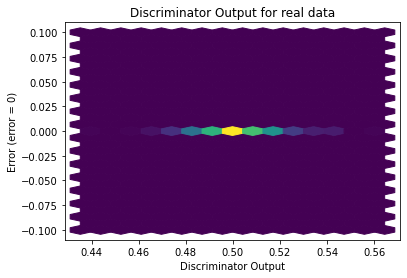

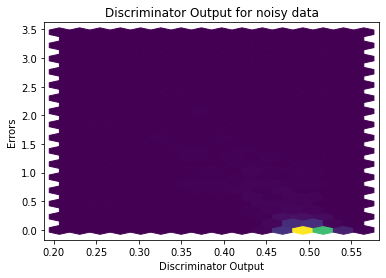

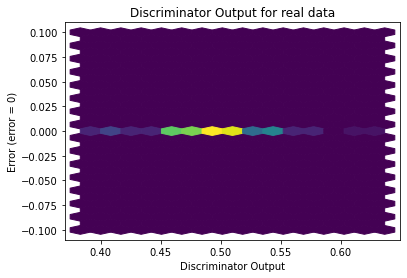

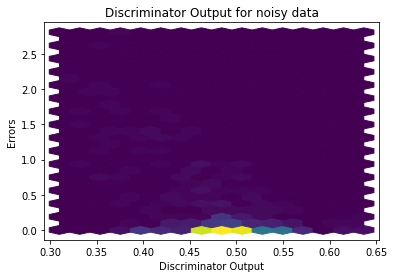

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


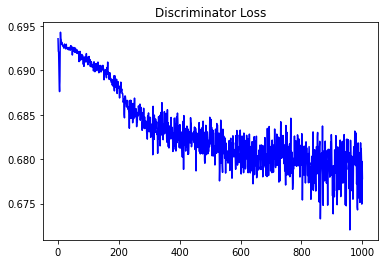

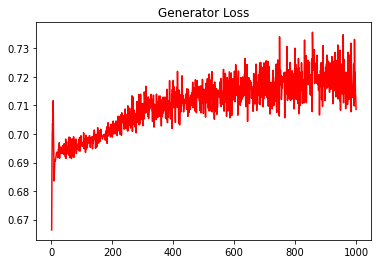

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.10613582447147173


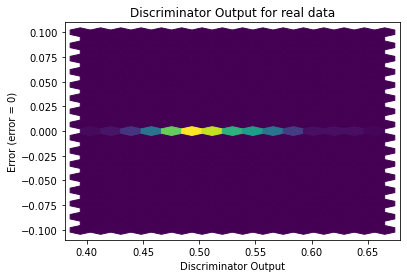

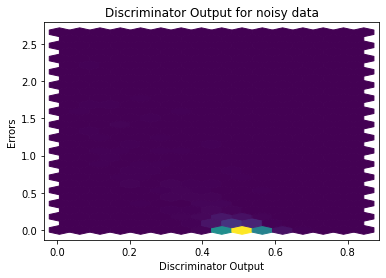

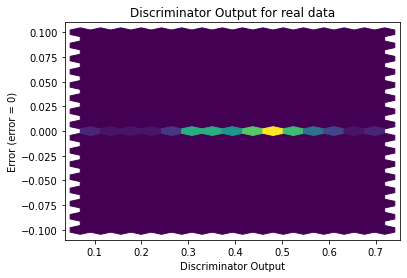

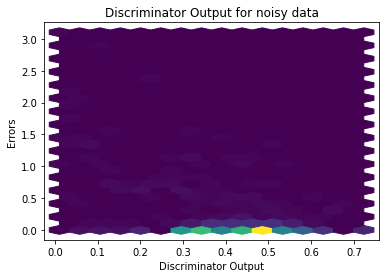

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2248]], requires_grad=True)
